In [1]:
from simtk import openmm, unit
from simtk.openmm import app
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import pickle

In [2]:
def compute_phi_psi_ala2(trajectory):
    phi_atoms = [4, 6, 8, 14]
    phi = md.compute_dihedrals(trajectory, indices=[phi_atoms])[:, 0]
    psi_atoms = [6, 8, 14, 16]
    psi = md.compute_dihedrals(trajectory, indices=[psi_atoms])[:, 0]
    return phi, psi

In [3]:
def compute_phi_psi_pro(trajectory):
    phi_atoms = [4,6,7,9]
    phi = md.compute_dihedrals(trajectory, indices=[phi_atoms])[:, 0]
    psi_atoms = [6,7,9,24]
    psi = md.compute_dihedrals(trajectory, indices=[psi_atoms])[:, 0]
    return phi, psi

In [4]:
def plot_phi_psi(ax, fname, label, molecule='ala2',stride=1, cut=1):
    
    if molecule == 'pro':
        fpath_stub = 'proline'
        top_file = f'{fpath_stub}/cis_pro.pdb'
        system_file = f'{fpath_stub}/noconstraints_xmlsystem.txt'
        n_atoms = 26
    elif molecule == 'ala2':
        fpath_stub = 'Alanine_dipeptide'
        top_file = 'Alanine_dipeptide/ala2_fromURL.pdb'
        system_file = 'Alanine_dipeptide/ala2_noconstraints_system.txt'
        n_atoms = 22
    
    if 'coupled' in fname:
        traj = md.load(f'Coupled_scheme/Trajectories/{fname}.dcd', top=f'{top_file}', stride=stride)
    else:
        traj = md.load(f'{fpath_stub}/Trajectories/{fname}.dcd', top=f'{top_file}', stride=stride)
    # with open('parameterfile.txt') as f:
    #     parameters = f.read()
    
    try:
        
        pickleFile = open(f'{fpath_stub}/parameters/parameters{fname}.pkl','rb')
        parametersdict = pickle.load(pickleFile)
        temperature = parametersdict['Temperature']
        collision_rate = parametersdict['Collision rate']
        timestep = parametersdict['Timestep']
        try:
            reportInterval = parametersdict['Report Interval']
        except:
            reportInterval = 'N/A'
        
    except:

        if '1000' in fname:
            temperature = 1000.0 * unit.kelvin
            collision_rate = 1.0 / unit.picosecond
            timestep = 1.0 * unit.femtosecond
            reportInterval = 2500
        elif 'samples' in fname:
            temperature = 300.0 * unit.kelvin
            collision_rate = 'N/A'
            timestep = 'N/A'
            reportInterval = 'N/A'
        else:
            temperature = 300.0 * unit.kelvin
            collision_rate = 1.0 / unit.picosecond
            timestep = 'N/A'
            reportInterval = 'N/A'


    parameters = f'{temperature}\nCollision rate:{collision_rate}\nTimestep: {timestep}\nReport every {reportInterval} steps'

    try:
        time = traj.n_frames*reportInterval*timestep
    except:
        time = 'N/A'
    
    if molecule == 'ala2':
        phi, psi = compute_phi_psi_ala2(traj[:round(traj.n_frames*cut)])
    elif molecule == 'pro':
        phi, psi = compute_phi_psi_pro(traj[:round(traj.n_frames*cut)])

    bins=np.linspace(-np.pi, np.pi, 50)
    print('length', label, traj.n_frames)
    
    ax.hist2d(phi, psi, bins=bins, norm=LogNorm())
    ax.set_xlim(-np.pi, np.pi)
    ax.set_ylim(-np.pi, np.pi)
    ax.set_title(label)
    # try:
    #     ax.set_xlabel(f"$\phi$ \n {parameters}\n Time: {time.value_in_unit(unit.seconds):.3E} s")
    # except:
    #     ax.set_xlabel(f"$\phi$ \n {parameters} \nTime: {time} s")
    #ax.set_xlabel(f"$\phi$")
    ax.set_xlabel("$\phi$")
    _ = ax.set_ylabel("$\psi$")

length Constrained MD - 50:50 $\it{cis}$, $\it{trans}$ 200000
length Constrained MD - 50:50 $\it{cis}$, $\it{trans}$
frames matched to coupled scheme 10000
length Unconstrained MD
20:80 $\it{cis}$, $\it{trans}$ 10000
length Coupled scheme 1000 cycles
100 ps MD stage 10183
length BG samples 10000


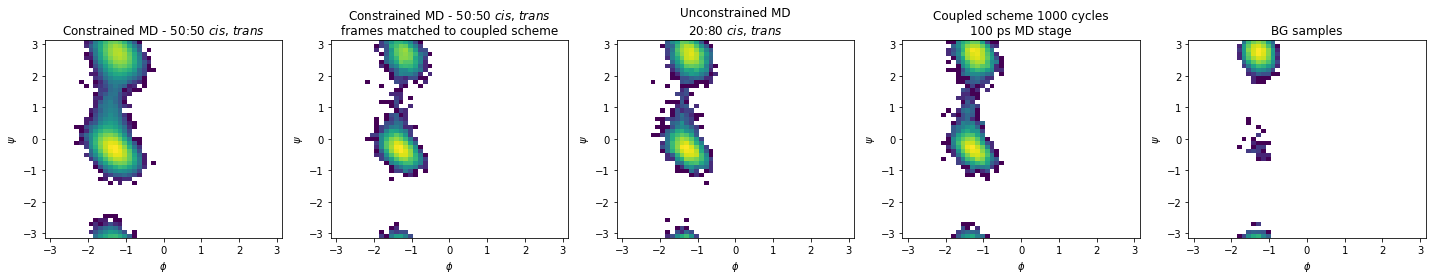

In [9]:
#example - figure 18C-F in thesis

fig, axes = plt.subplots(1,5,figsize=(20,4))

plot_phi_psi(axes[0], 'joined_pro_300K_noconstr', 'Constrained MD - 50:50 $\it{cis}$, $\it{trans}$', molecule='pro')
plot_phi_psi(axes[1], 'joined_pro_300K_noconstr', 'Constrained MD - 50:50 $\it{cis}$, $\it{trans}$\nframes matched to coupled scheme', molecule='pro', stride=20)
plot_phi_psi(axes[2], 'trans80_cis20_300K_noconstr', 'Unconstrained MD\n20:80 $\it{cis}$, $\it{trans}$', molecule='pro', stride=10)
plot_phi_psi(axes[3], 'coupled_pro_300K_100psMD', 'Coupled scheme 1000 cycles\n100 ps MD stage', molecule='pro')
plot_phi_psi(axes[4], 'unconstrainedMD_300K_2_samplestraj', 'BG samples', molecule='pro')

plt.tight_layout()
#plt.text()
#plt.savefig(f'vary_temp/{fname}.png', bbox_inches="tight")
#plt.close()

In [9]:
import pickle

pickleFile = open('Alanine_dipeptide/parameters300K.pkl','rb')

pickle.load(pickleFile)

{'Collision rate': Quantity(value=1.0, unit=/picosecond),
 'Temperature': Quantity(value=300.0, unit=kelvin),
 'Timestep': Quantity(value=4.0, unit=femtosecond),
 'Report Interval': 2500}

In [12]:
tsftraj = md.load('Alanine_dipeptide/Trajectories/TSFtraj_full.dcd',top='Alanine_dipeptide/ala2_fromURL.pdb', stride=10)

tsftraj.save('Alanine_dipeptide/Trajectories/TSFtraj_stride10.dcd')

In [12]:
temperature = 300.0 * unit.kelvin
collision_rate = 1.0 / unit.picosecond
timestep = 1.0 * unit.femtosecond
reportInterval = 5000
steps = 5E+6
fname = '300K_1fs_noconstr_long_stride2'
#time = (steps*timestep).value_in_unit(unit.nanosecond)
parametersdict = {'Collision rate':collision_rate,'Temperature':temperature,'Timestep':timestep,'Report Interval':reportInterval}
import pickle
f_p = open(f'Alanine_dipeptide/parameters/parameters{fname}.pkl','wb')
pickle.dump(parametersdict,f_p)
f_p.close


<function BufferedWriter.close>